# ImageNet

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test
from models import AlexNet_imagenet, VGG11_imagenet, ResNet18_imagenet
data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_dataset =torchvision.datasets.ImageFolder(root='./datasets/ImageNet/train',transform=data_transform)
test_dataset = torchvision.datasets.ImageFolder(root='./datasets/ImageNet/val',transform=data_transform)

In [4]:
#执行每个opoch
train_dataloader =DataLoader(train_dataset,batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=128, shuffle=True) 

alexnet = AlexNet_imagenet().to(device)
summary(alexnet, (3,224,224))
train_and_test(train_dataloader, test_dataloader, alexnet, 'alexnet_imagenet', epochs=30, learning_rate=1e-3, batch_size=128,imagenet_optimize=False)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [5]:
#执行每个opoch
train_dataloader =DataLoader(train_dataset,batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=32, shuffle=True) 
vgg11 = VGG11_imagenet().to(device)
summary(vgg11, (3,224,224))
train_and_test(train_dataloader, test_dataloader, vgg11, 'vgg11_imagenet', epochs=30, learning_rate=1e-3, batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

Test Error: 
 Accuracy: 70.4%, Avg loss: 0.875052 

Epoch 24
-------------------------------
loss:0.577963 [    0/13000]
loss:0.393215 [ 3200/13000]
loss:0.621959 [ 6400/13000]
loss:0.822950 [ 9600/13000]
loss:0.840658 [12800/13000]
loss:0.628458 [12960/13000]
Test Error: 
 Accuracy: 73.6%, Avg loss: 0.773735 

Epoch 25
-------------------------------
loss:0.655472 [    0/13000]
loss:0.523085 [ 3200/13000]
loss:0.559752 [ 6400/13000]
loss:0.790259 [ 9600/13000]
loss:0.413693 [12800/13000]
loss:0.560887 [12960/13000]
Test Error: 
 Accuracy: 72.2%, Avg loss: 0.778700 

Epoch 26
-------------------------------
loss:0.667619 [    0/13000]
loss:0.605306 [ 3200/13000]
loss:0.491239 [ 6400/13000]
loss:0.415008 [ 9600/13000]
loss:0.572492 [12800/13000]
loss:0.486224 [12960/13000]
Test Error: 
 Accuracy: 76.6%, Avg loss: 0.671035 

Epoch 27
-------------------------------
loss:0.720583 [    0/13000]
loss:0.576119 [ 3200/13000]
loss:0.335572 [ 6400/13000]
loss:0.507545 [ 9600/13000]
loss:0.66261

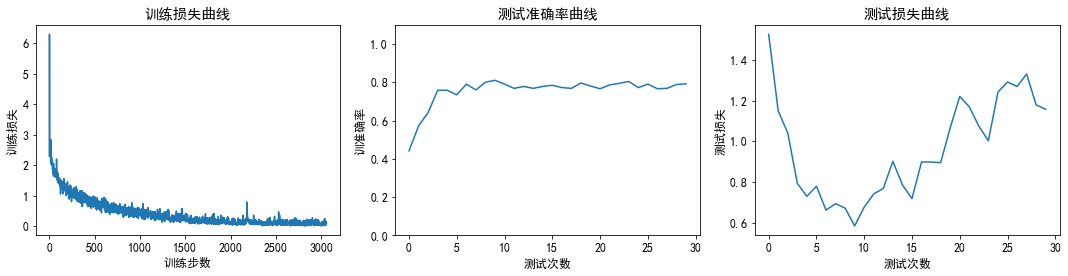

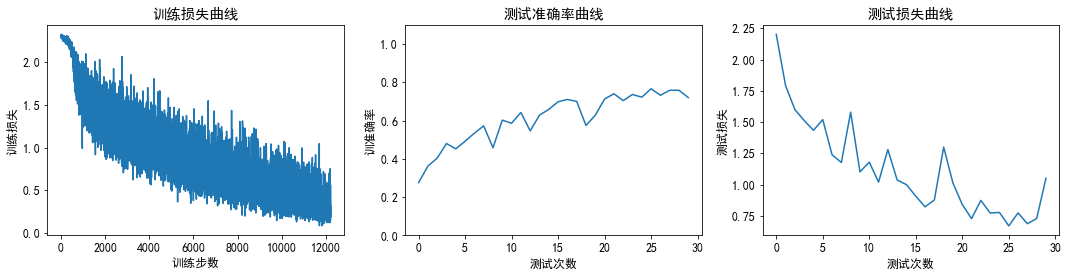

In [14]:
from utils import draw_chart
draw_chart('alexnet_imagenet', True, True )
draw_chart('vgg11_imagenet', True, True)

# Cifar-10

In [32]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test

train_data = torchvision.datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

test_data = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

In [2]:
from models import AlexNet_cifar
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ',device)
alexnet_cifar = AlexNet_cifar(10).to(device)
summary(alexnet_cifar, (3,32,32))
train_and_test(train_dataloader, test_dataloader, alexnet_cifar, 'alexnet_cifar', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)

Device:  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           1,792
              ReLU-2           [-1, 64, 16, 16]               0
         MaxPool2d-3             [-1, 64, 7, 7]               0
            Conv2d-4            [-1, 192, 7, 7]         307,392
              ReLU-5            [-1, 192, 7, 7]               0
         MaxPool2d-6            [-1, 192, 3, 3]               0
            Conv2d-7            [-1, 384, 3, 3]         663,936
              ReLU-8            [-1, 384, 3, 3]               0
            Conv2d-9            [-1, 256, 3, 3]         884,992
             ReLU-10            [-1, 256, 3, 3]               0
           Conv2d-11            [-1, 256, 3, 3]         590,080
             ReLU-12            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-13            [-1, 256, 1, 1]               0
          Dropout-14     

loss:0.203390 [12800/50000]
loss:0.220629 [25600/50000]
loss:0.307743 [38400/50000]
loss:0.246757 [49792/50000]
Test Error: 
 Accuracy: 68.0%, Avg loss: 1.521504 

Epoch 29
-------------------------------
loss:0.186487 [    0/50000]
loss:0.176693 [12800/50000]
loss:0.191266 [25600/50000]
loss:0.164460 [38400/50000]
loss:0.201349 [49792/50000]
Test Error: 
 Accuracy: 67.2%, Avg loss: 1.597249 

Epoch 30
-------------------------------
loss:0.151232 [    0/50000]
loss:0.198122 [12800/50000]
loss:0.265353 [25600/50000]
loss:0.223604 [38400/50000]
loss:0.198151 [49792/50000]
Test Error: 
 Accuracy: 67.8%, Avg loss: 1.680739 

Save model: alexnet_cifar29.pth


In [2]:
from models import VGG11_cifar
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ',device)
vgg11_cifar = VGG11_cifar(10).to(device)
summary(vgg11_cifar, (3,32,32))
train_and_test(train_dataloader, test_dataloader, vgg11_cifar, 'vgg11_cifar', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)

Device:  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
              ReLU-5          [-1, 128, 16, 16]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         590,080
             ReLU-10            [-1, 256, 8, 8]               0
        MaxPool2d-11            [-1, 256, 4, 4]               0
           Conv2d-12            [-1, 512, 4, 4]       1,180,160
             ReLU-13            [-1, 512, 4, 4]               0
           Conv2d-14     

Test Error: 
 Accuracy: 74.8%, Avg loss: 1.329198 

Epoch 27
-------------------------------
loss:0.028587 [    0/50000]
loss:0.129376 [12800/50000]
loss:0.137394 [25600/50000]
loss:0.089265 [38400/50000]
loss:0.193600 [49792/50000]
Test Error: 
 Accuracy: 74.6%, Avg loss: 1.315265 

Epoch 28
-------------------------------
loss:0.064020 [    0/50000]
loss:0.018193 [12800/50000]
loss:0.106594 [25600/50000]
loss:0.148357 [38400/50000]
loss:0.017951 [49792/50000]
Test Error: 
 Accuracy: 74.1%, Avg loss: 1.425452 

Epoch 29
-------------------------------
loss:0.064868 [    0/50000]
loss:0.121792 [12800/50000]
loss:0.085098 [25600/50000]
loss:0.065744 [38400/50000]
loss:0.057130 [49792/50000]
Test Error: 
 Accuracy: 74.4%, Avg loss: 1.407961 

Epoch 30
-------------------------------
loss:0.102869 [    0/50000]
loss:0.070052 [12800/50000]
loss:0.026183 [25600/50000]
loss:0.193945 [38400/50000]
loss:0.128604 [49792/50000]
Test Error: 
 Accuracy: 73.9%, Avg loss: 1.531922 

Save model: vgg1

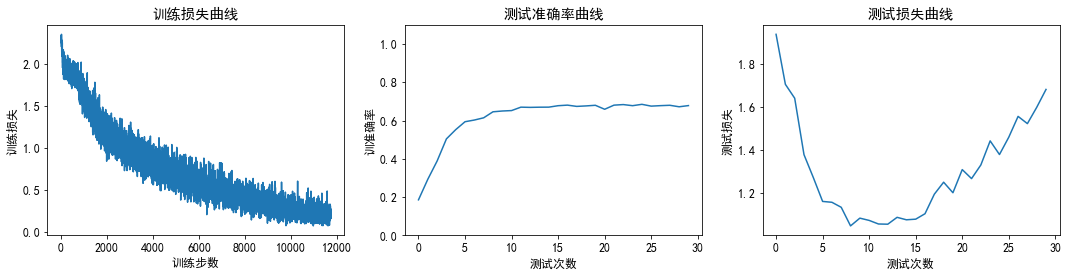

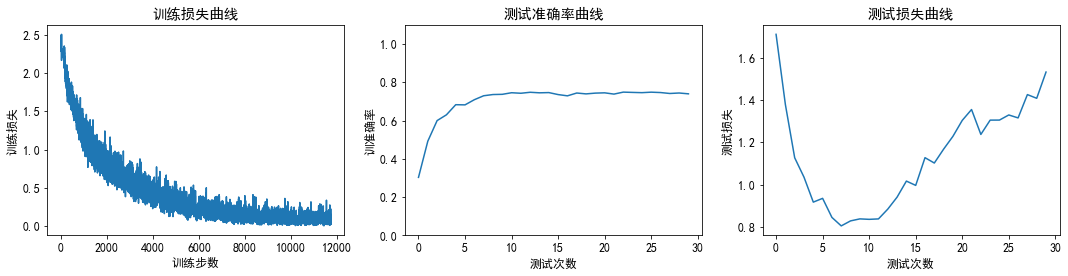

In [9]:
from utils import draw_chart
draw_chart('alexnet_cifar', True, True)
draw_chart('vgg11_cifar', True, True)

In [30]:
from models import load_pretrained_model
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test

train_data = torchvision.datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

test_data = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

class VGG11_cifar_layer_prune(nn.Module):
    def __init__(self, num_classes=10, prune_layers=11, pretrained=False):
        super(VGG11_cifar_layer_prune, self).__init__()
        pretrained_model = load_pretrained_model('vgg11_cifar')
        self.features = pretrained_model.features[:prune_layers]
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512,num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

prune_model = VGG11_cifar_layer_prune().cuda()
train_and_test(train_dataloader, test_dataloader, prune_model, 'vgg11_cifar_layer_prune', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)

Load  VGG11_cifar
Epoch 1
-------------------------------
loss:2.301546 [    0/50000]
loss:1.063415 [12800/50000]
loss:0.825334 [25600/50000]
loss:0.856834 [38400/50000]
loss:0.978581 [49792/50000]
Test Error: 
 Accuracy: 69.3%, Avg loss: 0.844478 

Epoch 2
-------------------------------
loss:0.856381 [    0/50000]
loss:0.753212 [12800/50000]
loss:0.636280 [25600/50000]
loss:0.616873 [38400/50000]
loss:0.608579 [49792/50000]
Test Error: 
 Accuracy: 72.8%, Avg loss: 0.769198 

Epoch 3
-------------------------------
loss:0.660830 [    0/50000]
loss:0.619254 [12800/50000]
loss:0.872439 [25600/50000]
loss:0.589635 [38400/50000]
loss:0.577668 [49792/50000]
Test Error: 
 Accuracy: 76.0%, Avg loss: 0.703064 

Epoch 4
-------------------------------
loss:0.578671 [    0/50000]
loss:0.509232 [12800/50000]
loss:0.588591 [25600/50000]
loss:0.332191 [38400/50000]
loss:0.483595 [49792/50000]
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.670738 

Epoch 5
-------------------------------
loss:0.314567 

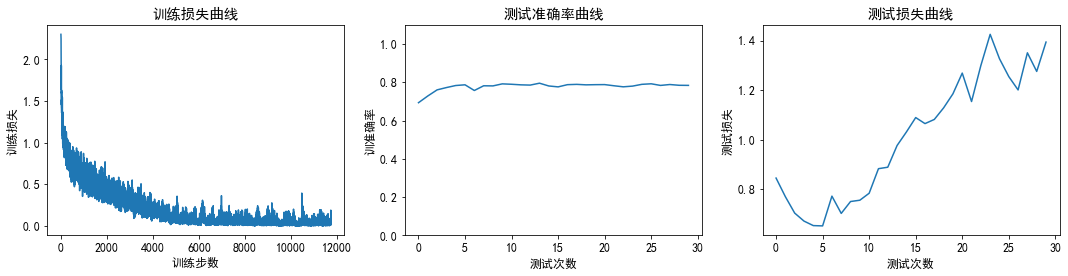

In [31]:
from utils import draw_chart
draw_chart('vgg11_cifar_layer_prune', True, True)

In [33]:
from models import load_pretrained_model
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test

train_data = torchvision.datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

test_data = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=False,
    download=False,
    transform=transforms.ToTensor()
)
def test(model, test_loader, show=True):
    model.eval()
    correct = 0
    acc = 0
    cls_num = 10
    cls_acc = np.zeros(cls_num)
    size = np.zeros(cls_num)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            correct += (output.argmax(1)==target).type(torch.float).sum().item()

            for i in range(data.shape[0]):
                    size[target[i]] += 1
                    if (output.argmax(1)==target)[i]:
                        cls_acc[target[i]]+=1
        
    acc = correct / size.sum()
    cls_acc = cls_acc/size
    if show:
        print("Test Accuracy = {0:.3f} Class Accuracy: {1}".format(acc, np.round(cls_acc,3)))
    return acc, cls_acc
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

class VGG11_cifar_layer_prune(nn.Module):
    def __init__(self, num_classes=10, prune_layers=11, pretrained=False):
        super(VGG11_cifar_layer_prune, self).__init__()
        self.features = torchvision.models.vgg11(pretrained).features[:prune_layers]
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512,num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

prune_model = VGG11_cifar_layer_prune().cuda()
train_and_test(train_dataloader, test_dataloader, prune_model, 'vgg11_cifar_layer_prune_1', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)
test(prune_model, test_dataloader)

Epoch 1
-------------------------------
loss:2.298866 [    0/50000]
loss:1.947591 [12800/50000]
loss:1.560428 [25600/50000]
loss:1.490746 [38400/50000]
loss:1.580029 [49792/50000]
Test Error: 
 Accuracy: 44.4%, Avg loss: 1.497961 

Epoch 2
-------------------------------
loss:1.613284 [    0/50000]
loss:1.470234 [12800/50000]
loss:1.132734 [25600/50000]
loss:1.172507 [38400/50000]
loss:1.235841 [49792/50000]
Test Error: 
 Accuracy: 55.9%, Avg loss: 1.205309 

Epoch 3
-------------------------------
loss:1.191912 [    0/50000]
loss:0.988573 [12800/50000]
loss:1.185650 [25600/50000]
loss:1.029407 [38400/50000]
loss:0.937489 [49792/50000]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.090807 

Epoch 4
-------------------------------
loss:1.000427 [    0/50000]
loss:0.988725 [12800/50000]
loss:0.801850 [25600/50000]
loss:1.019836 [38400/50000]
loss:0.922550 [49792/50000]
Test Error: 
 Accuracy: 66.2%, Avg loss: 0.954536 

Epoch 5
-------------------------------
loss:1.008922 [    0/50000]
loss

(0.7914,
 array([0.786, 0.887, 0.694, 0.671, 0.748, 0.722, 0.832, 0.785, 0.917,
        0.872]))

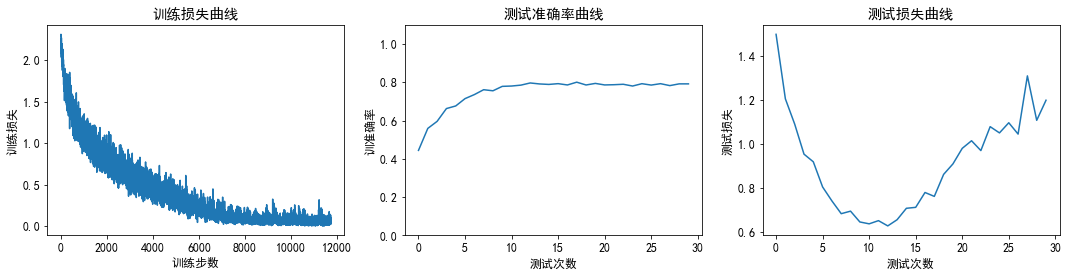

In [34]:
from utils import draw_chart
draw_chart('vgg11_cifar_layer_prune_1', True, True)

In [36]:
from torchsummary import summary
summary(prune_model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
              ReLU-5          [-1, 128, 16, 16]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         590,080
             ReLU-10            [-1, 256, 8, 8]               0
        MaxPool2d-11            [-1, 256, 4, 4]               0
AdaptiveAvgPool2d-12            [-1, 256, 1, 1]               0
          Flatten-13                  [-1, 256]               0
           Linear-14                  [

In [38]:
from models import load_pretrained_model
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test

train_data = torchvision.datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

test_data = torchvision.datasets.CIFAR10(
    root="./datasets",
    train=False,
    download=False,
    transform=transforms.ToTensor()
)
def test(model, test_loader, show=True):
    model.eval()
    correct = 0
    acc = 0
    cls_num = 10
    cls_acc = np.zeros(cls_num)
    size = np.zeros(cls_num)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            correct += (output.argmax(1)==target).type(torch.float).sum().item()

            for i in range(data.shape[0]):
                    size[target[i]] += 1
                    if (output.argmax(1)==target)[i]:
                        cls_acc[target[i]]+=1
        
    acc = correct / size.sum()
    cls_acc = cls_acc/size
    if show:
        print("Test Accuracy = {0:.3f} Class Accuracy: {1}".format(acc, np.round(cls_acc,3)))
    return acc, cls_acc
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

class VGG11_cifar_layer_prune(nn.Module):
    def __init__(self, num_classes=10, prune_layers=13, pretrained=False):
        super(VGG11_cifar_layer_prune, self).__init__()
        self.features = torchvision.models.vgg11(pretrained).features[:prune_layers]
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

prune_model = VGG11_cifar_layer_prune().cuda()
summary(prune_model, (3,32,32))
train_and_test(train_dataloader, test_dataloader, prune_model, 'vgg11_cifar_layer_prune_2', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)
test(prune_model, test_dataloader)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
              ReLU-5          [-1, 128, 16, 16]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         590,080
             ReLU-10            [-1, 256, 8, 8]               0
        MaxPool2d-11            [-1, 256, 4, 4]               0
           Conv2d-12            [-1, 512, 4, 4]       1,180,160
             ReLU-13            [-1, 512, 4, 4]               0
AdaptiveAvgPool2d-14            [-1, 51

Test Error: 
 Accuracy: 76.8%, Avg loss: 1.212481 

Epoch 29
-------------------------------
loss:0.065969 [    0/50000]
loss:0.032525 [12800/50000]
loss:0.027884 [25600/50000]
loss:0.042386 [38400/50000]
loss:0.101375 [49792/50000]
Test Error: 
 Accuracy: 77.6%, Avg loss: 1.281452 

Epoch 30
-------------------------------
loss:0.085128 [    0/50000]
loss:0.021367 [12800/50000]
loss:0.026189 [25600/50000]
loss:0.030419 [38400/50000]
loss:0.018185 [49792/50000]
Test Error: 
 Accuracy: 77.3%, Avg loss: 1.246867 

Save model: vgg11_cifar_layer_prune_229.pth
Test Accuracy = 0.773 Class Accuracy: [0.845 0.925 0.759 0.564 0.688 0.726 0.906 0.725 0.844 0.749]


(0.7731,
 array([0.845, 0.925, 0.759, 0.564, 0.688, 0.726, 0.906, 0.725, 0.844,
        0.749]))

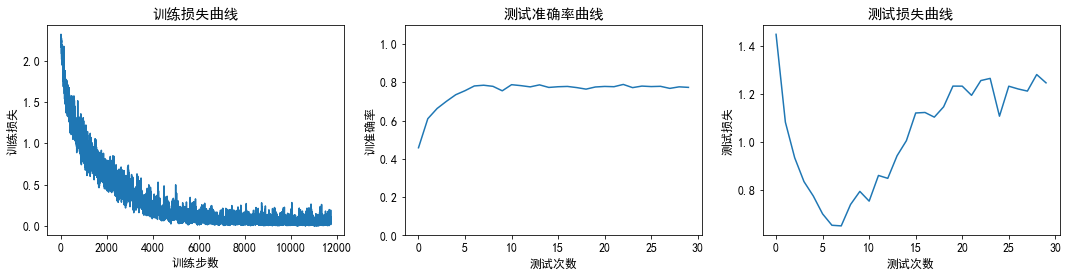

In [40]:
from utils import draw_chart
draw_chart('vgg11_cifar_layer_prune_2', True, True)

# MNIST

In [5]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np
from models import train_and_test

train_data = torchvision.datasets.MNIST(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

test_data = torchvision.datasets.MNIST(
    root="./datasets",
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

In [6]:
from models import AlexNet_mnist
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ',device)
alexnet_mnist = AlexNet_mnist(10).to(device)
summary(alexnet_mnist, (1,32,32))
train_and_test(train_dataloader, test_dataloader, alexnet_mnist, 'alexnet_mnist', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)

Device:  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]             640
              ReLU-2           [-1, 64, 16, 16]               0
         MaxPool2d-3             [-1, 64, 7, 7]               0
            Conv2d-4            [-1, 192, 7, 7]         307,392
              ReLU-5            [-1, 192, 7, 7]               0
         MaxPool2d-6            [-1, 192, 3, 3]               0
            Conv2d-7            [-1, 384, 3, 3]         663,936
              ReLU-8            [-1, 384, 3, 3]               0
            Conv2d-9            [-1, 256, 3, 3]         884,992
             ReLU-10            [-1, 256, 3, 3]               0
           Conv2d-11            [-1, 256, 3, 3]         590,080
             ReLU-12            [-1, 256, 3, 3]               0
AdaptiveAvgPool2d-13            [-1, 256, 1, 1]               0
          Dropout-14     

loss:0.083278 [12800/60000]
loss:0.000678 [25600/60000]
loss:0.002561 [38400/60000]
loss:0.000023 [51200/60000]
loss:0.003709 [59776/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.059313 

Epoch 26
-------------------------------
loss:0.002318 [    0/60000]
loss:0.001030 [12800/60000]
loss:0.001638 [25600/60000]
loss:0.092127 [38400/60000]
loss:0.000297 [51200/60000]
loss:0.000549 [59776/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.071207 

Epoch 27
-------------------------------
loss:0.000231 [    0/60000]
loss:0.000664 [12800/60000]
loss:0.005357 [25600/60000]
loss:0.026246 [38400/60000]
loss:0.016418 [51200/60000]
loss:0.005010 [59776/60000]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.071526 

Epoch 28
-------------------------------
loss:0.002571 [    0/60000]
loss:0.017347 [12800/60000]
loss:0.007408 [25600/60000]
loss:0.000007 [38400/60000]
loss:0.000721 [51200/60000]
loss:0.005163 [59776/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.068224 

Epoch 29
----------------

In [7]:
from models import VGG11_mnist
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ',device)
vgg11_mnist = VGG11_mnist(10).to(device)
summary(vgg11_mnist, (1,32,32))
train_and_test(train_dataloader, test_dataloader, vgg11_mnist, 'vgg11_mnist', epochs=30, learning_rate = 1e-3, batch_size = 128, steps=100,imagenet_optimize=False)

Device:  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]             640
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
              ReLU-5          [-1, 128, 16, 16]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         590,080
             ReLU-10            [-1, 256, 8, 8]               0
        MaxPool2d-11            [-1, 256, 4, 4]               0
           Conv2d-12            [-1, 512, 4, 4]       1,180,160
             ReLU-13            [-1, 512, 4, 4]               0
           Conv2d-14     

loss:0.000037 [12800/60000]
loss:0.030117 [25600/60000]
loss:0.017918 [38400/60000]
loss:0.013890 [51200/60000]
loss:0.023275 [59776/60000]
Test Error: 
 Accuracy: 99.4%, Avg loss: 0.041902 

Epoch 25
-------------------------------
loss:0.016372 [    0/60000]
loss:0.000078 [12800/60000]
loss:0.001243 [25600/60000]
loss:0.011287 [38400/60000]
loss:0.000019 [51200/60000]
loss:0.031200 [59776/60000]
Test Error: 
 Accuracy: 99.2%, Avg loss: 0.046944 

Epoch 26
-------------------------------
loss:0.041537 [    0/60000]
loss:0.000341 [12800/60000]
loss:0.007319 [25600/60000]
loss:0.000725 [38400/60000]
loss:0.000893 [51200/60000]
loss:0.000346 [59776/60000]
Test Error: 
 Accuracy: 99.4%, Avg loss: 0.049126 

Epoch 27
-------------------------------
loss:0.025062 [    0/60000]
loss:0.001643 [12800/60000]
loss:0.000359 [25600/60000]
loss:0.000475 [38400/60000]
loss:0.002937 [51200/60000]
loss:0.008342 [59776/60000]
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.037567 

Epoch 28
----------------

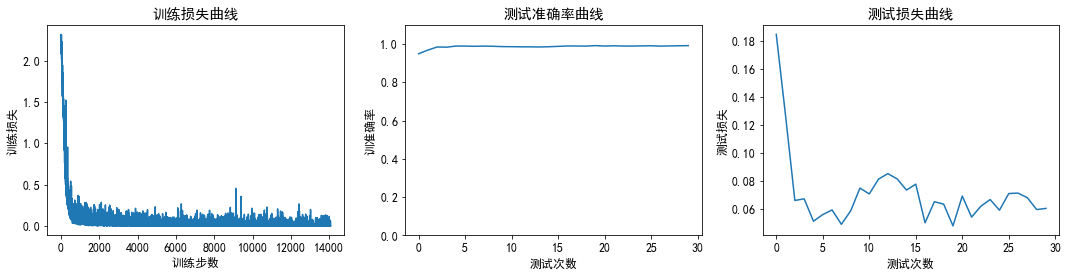

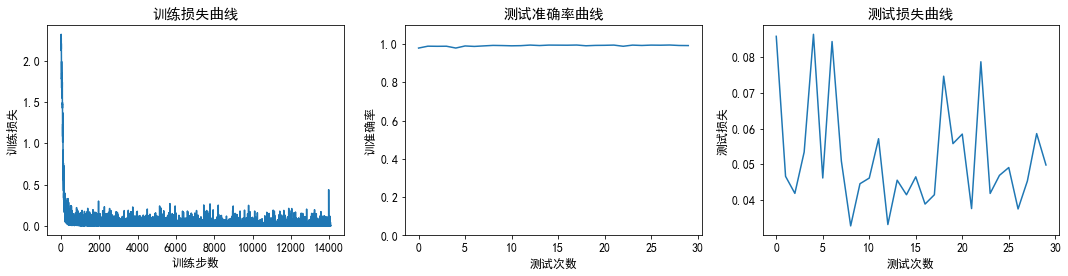

In [8]:
from utils import draw_chart
draw_chart('alexnet_mnist', True, save=True)
draw_chart('vgg11_mnist', True, save=True)

In [2]:
# Standard imports 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import colorcet as cc
import torchvision
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
# From the repository
from utils import load_imagenet_img, make_grayscale, make_black_white, show_mask_on_image, cut_image_with_mask, show_img
from vis import VanillaGradient, Deconvolution, GuidedBackprop, IntegratedGradients, visualize_imagenet, show_mask
from models import load_pretrained_model, test_loop
import time
import warnings
warnings.filterwarnings('ignore')

def test(model, test_loader, show=True):
    model.eval()
    correct = 0
    acc = 0
    cls_num = 10
    cls_acc = np.zeros(cls_num)
    size = np.zeros(cls_num)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            correct += (output.argmax(1)==target).type(torch.float).sum().item()

            for i in range(data.shape[0]):
                    size[target[i]] += 1
                    if (output.argmax(1)==target)[i]:
                        cls_acc[target[i]]+=1
        
    acc = correct / size.sum()
    cls_acc = cls_acc/size
    if show:
        print("Test Accuracy = {0:.3f} Class Accuracy: {1}".format(acc, np.round(cls_acc,3)))
    return acc, cls_acc

In [3]:
data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
test_dataset = torchvision.datasets.ImageFolder(root='./datasets/ImageNet/val',transform=data_transform)
test_dataloader = DataLoader(test_dataset,batch_size=128, shuffle=True)   

model_name_list = ['AlexNet_imagenet','VGG11_imagenet']
for i in range(2):
    model = load_pretrained_model(model_name_list[i].lower())
    model.eval()
    loss_fn = nn.CrossEntropyLoss()

    test_loss, acc = test_loop(test_dataloader, model, loss_fn)
    test(model, test_dataloader)

Load  AlexNet_imagenet
Test Error: 
 Accuracy: 81.4%, Avg loss: 0.994053 

Test Accuracy = 0.814 Class Accuracy: [0.82 0.58 0.82 0.88 0.84 0.84 0.68 0.92 0.92 0.84]
Load  VGG11_imagenet
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.991643 

Test Accuracy = 0.730 Class Accuracy: [0.94 0.56 0.66 0.86 0.72 0.82 0.68 0.86 0.8  0.4 ]


In [4]:
test_data = torchvision.datasets.CIFAR10(
    root="./datasets",#路径
    train=False,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

model_name_list = ['AlexNet_cifar','VGG11_cifar']
for i in range(2):
    model = load_pretrained_model(model_name_list[i].lower())
    model.eval()
    loss_fn = nn.CrossEntropyLoss()

    test_loss, acc = test_loop(test_dataloader, model, loss_fn)
    test(model, test_dataloader)

Load  AlexNet_cifar
Test Error: 
 Accuracy: 67.9%, Avg loss: 1.670880 

Test Accuracy = 0.679 Class Accuracy: [0.729 0.784 0.525 0.464 0.573 0.618 0.774 0.729 0.846 0.751]
Load  VGG11_cifar
Test Error: 
 Accuracy: 73.9%, Avg loss: 1.566129 

Test Accuracy = 0.739 Class Accuracy: [0.79  0.883 0.518 0.559 0.639 0.627 0.852 0.829 0.831 0.866]


In [6]:
model_name_list = ['AlexNet_cifar','VGG11_cifar']
model = load_pretrained_model(model_name_list[1].lower())
print(model)

Load  VGG11_cifar
VGG11_cifar(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [5]:
test_data = torchvision.datasets.MNIST(
    root="./datasets",#路径
    train=False,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

model_name_list = ['AlexNet_mnist','VGG11_mnist']
for i in range(2):
    model = load_pretrained_model(model_name_list[i].lower())
    model.eval()
    loss_fn = nn.CrossEntropyLoss()

    test_loss, acc = test_loop(test_dataloader, model, loss_fn)
    test(model, test_dataloader)

Load  AlexNet_mnist
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.056052 

Test Accuracy = 0.991 Class Accuracy: [0.998 0.997 0.993 0.997 0.989 0.991 0.982 0.988 0.991 0.979]
Load  VGG11_mnist
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.056914 

Test Accuracy = 0.991 Class Accuracy: [0.99  0.996 0.996 0.998 0.984 0.99  0.992 0.985 0.996 0.985]
